In [1]:
import cartopy
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
import scipy.interpolate
import topo_builder

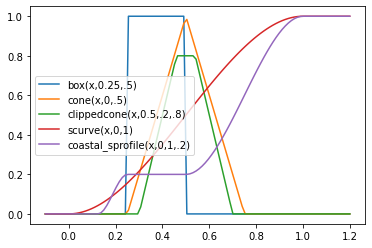

In [2]:
# These are some basic building blocks
ax = plt.subplot(111)
topo_builder.topo.test1d(ax)

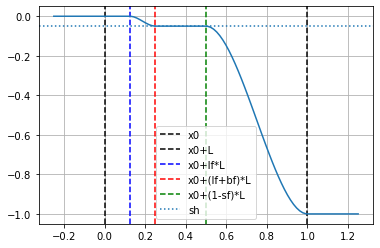

In [3]:
# Profile used at coasts
x = numpy.linspace(-.25,1.25,100)
x0 = 0; plt.axvline(x0, linestyle='--', color='k', label='x0')
L = 1; plt.axvline(x0+L, linestyle='--', color='k', label='x0+L')
lf = 0.125; plt.axvline(x0+lf*L, linestyle='--', color='b', label='x0+lf*L')
bf = 0.125; plt.axvline(x0+(lf+bf)*L, linestyle='--', color='r', label='x0+(lf+bf)*L')
sf = 0.5; plt.axvline(x0+(1-sf)*L, linestyle='--', color='g', label='x0+(1-sf)*L')
sh = 0.05; plt.axhline(-sh, linestyle=':', label='sh')
plt.plot(x, -topo_builder.topo.coastal_sprofile(x, x0, L, sh, lf, bf, sf) )
plt.grid()
plt.legend();

In [4]:
# NeverWorld2 domain
NW2_lonW, NW2_lonE = 0, 80
NW2_latS, NW2_latN = -70, 70

D0 = 4000 # Nominal depth (m)
cd = 200 # Depth of coastal shelf (m)
drake = 2500 # Depth of Drake sill (m)
cw = 5 # Width of coastal shelf (degrees)

# Logical domain (grid points)
nj, ni = 140, 80

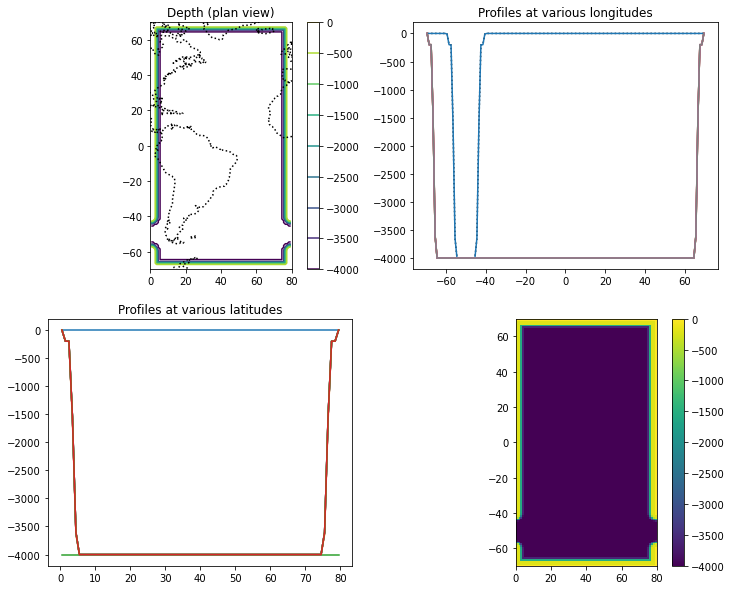

In [5]:
# Simple "Atlantic" box with re-entrant Drake passage

T = topo_builder.topo(nj, ni, dlon=NW2_lonE, dlat=NW2_latN-NW2_latS, lat0=NW2_latS, D=D0)
T.add_NS_coast(NW2_lonW, -40, 90, cw, cd)
T.add_NS_coast(NW2_lonE, -40, 90, cw, cd)
T.add_NS_coast(NW2_lonW, -90, -60, cw, cd)
T.add_NS_coast(NW2_lonE, -90, -60, cw, cd)
T.add_EW_coast(-360, 360, NW2_latS, cw, cd)
T.add_EW_coast(-360, 360, NW2_latN, cw, cd)

fig = plt.figure(figsize=(12,10))
T.plot(fig, Atlantic_lon_offset=-84)

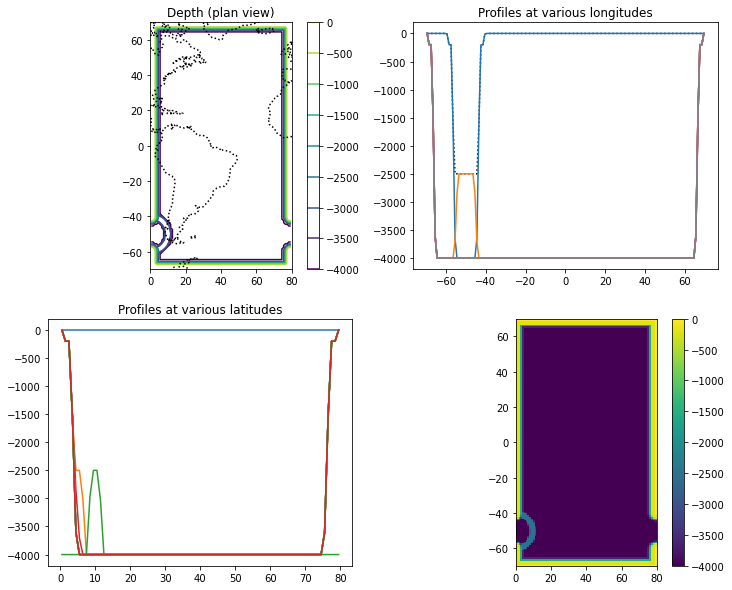

In [6]:
# Add a sill to Drake passage
T.add_circular_ridge(NW2_lonW, -50, 10, 2, drake) # Drake sill

fig = plt.figure(figsize=(12,10))
T.plot(fig, Atlantic_lon_offset=-84)

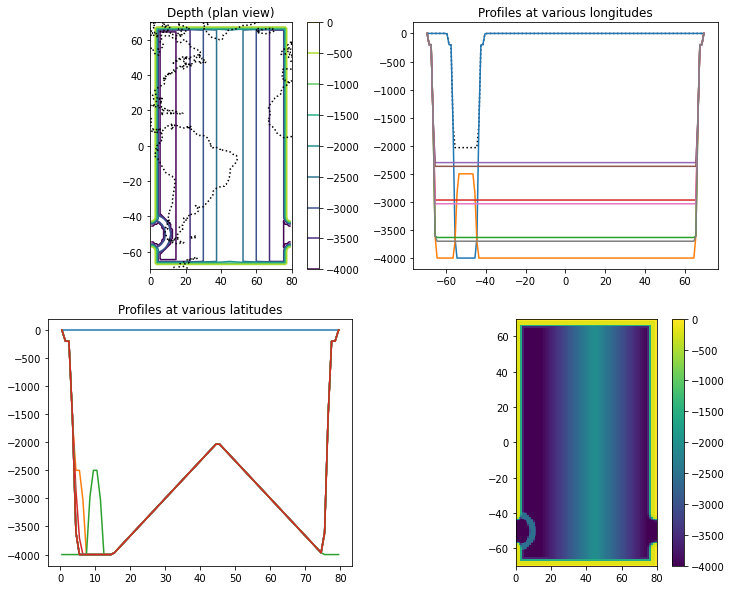

In [7]:
# Add a "Mid-Atlantic" ridge
T.add_NS_ridge(45, -90, 90, 30, D0/2) # Mid-Atlantic ridge?

fig = plt.figure(figsize=(12,10))
T.plot(fig, Atlantic_lon_offset=-84)

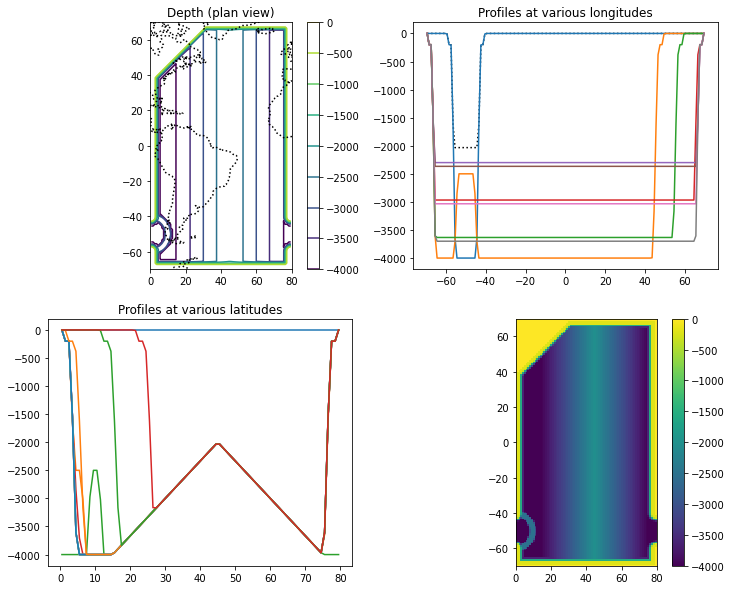

In [8]:
# Add a "New England" coastline
T.add_angled_coast(-40, 40, cw, cd) # New England

fig = plt.figure(figsize=(12,10))
T.plot(fig, Atlantic_lon_offset=-84)

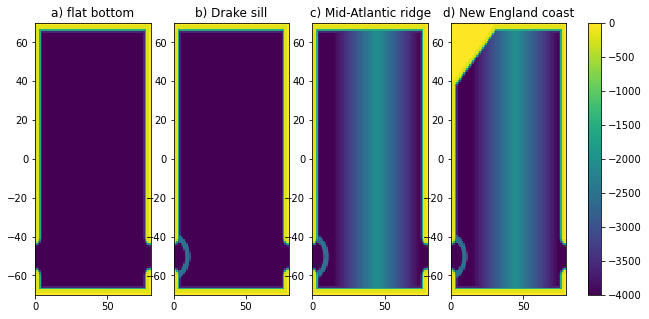

In [9]:
# Side-b-side comparison for discussion purposes
fig,axs = plt.subplots(1,1,figsize=(12,5))

T = topo_builder.topo(nj, ni, dlon=NW2_lonE, dlat=NW2_latN-NW2_latS, lat0=NW2_latS, D=D0)
T.add_NS_coast(NW2_lonW, -40, 90, cw, cd)
T.add_NS_coast(NW2_lonE, -40, 90, cw, cd)
T.add_NS_coast(NW2_lonW, -90, -60, cw, cd)
T.add_NS_coast(NW2_lonE, -90, -60, cw, cd)
T.add_EW_coast(-360, 360, NW2_latS, cw, cd)
T.add_EW_coast(-360, 360, NW2_latN, cw, cd)

plt.subplot(151)
plt.pcolormesh(T.xg, T.yg, T.z); plt.title('a) flat bottom')

T.add_circular_ridge(NW2_lonW, -50, 10, 2, drake) # Drake sill
plt.subplot(152)
plt.pcolormesh(T.xg, T.yg, T.z); plt.title('b) Drake sill')

T.add_NS_ridge(45, -90, 90, 30, D0/2) # Mid-Atlantic ridge?
plt.subplot(153)
plt.pcolormesh(T.xg, T.yg, T.z); plt.title('c) Mid-Atlantic ridge')

T.add_angled_coast(-40, 40, cw, cd) # New England
plt.subplot(154)
im = plt.pcolormesh(T.xg, T.yg, T.z); plt.title('d) New England coast')

cb = fig.colorbar(im, ax=axs, orientation='vertical', fraction=.175)